# **Analyzing Key Predictors of Stroke: A Data-Driven Approach**

## **Introduction**

Stroke remains one of the leading causes of disability and death worldwide, making the identification of key risk factors essential for effective prevention and treatment strategies. In this analysis, we aim to explore and predict stroke occurrence using a logistic regression model. By focusing on the application of regression techniques, this project seeks to better understand the relationships between predictors like age, hypertension, and heart disease, and their impact on stroke likelihood. Ultimately, this study highlights the potential of data-driven approaches in addressing critical healthcare challenges and improving patient outcomes.

## **Data**

The dataset used in this project is the "Healthcare Dataset Stroke Data," sourced from Kaggle. It provides a detailed collection of health-related information, including demographic, medical, and lifestyle factors, broken down into the following columns:

- **id:** Unique identifier
- **gender:** Gender of the patient
- **age:** Age of the patient
- **hypertension:** Whether the patient has hypertension
- **heart_disease:** Whether the patient has heart disease
- **ever_married:** Marital status
- **work_type:** Type of work
- **Residence_type:** Type of residence
- **avg_glucose_level:** Average glucose level in the blood
- **bmi:** Body mass index
- **smoking_status:** Smoking status
- **stroke:** Whether the patient had a stroke
- **age_bmi_interaction:** Interaction between age and BMI (created feature)

This data is publicly available at: [Stroke Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)

In [1]:
# Import the libraries to process our data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Read dataset
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
print(df.head())
print(df.info())

      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 e

## **Data Pre-Processing**

Prior to data analysis, certain preprocessing steps were taken to ensure accurate and relevant data:

- **Handling Missing Values:** Missing values in the bmi column were replaced with the column's mean, while missing values in the stroke column were replaced with 0 to maintain data completeness.
- **Encoding Categorical Variables:** Categorical columns such as gender, ever_married, work_type, Residence_type, and smoking_status were transformed into numerical representations using LabelEncoder, enabling compatibility with machine learning algorithms.
- **Standardizing Numerical Features:** Numerical features like age, avg_glucose_level, and bmi were scaled using StandardScaler to ensure consistency in their value ranges for better model performance.
- **Creating Interaction Features:** A new column, age_bmi_interaction, was created by multiplying the age and BMI features to capture their combined influence on the target variable.
- **Splitting Data into Training and Testing Sets:** The dataset was divided into training and testing subsets using an 80-20 split to facilitate model training and evaluation.

In [2]:
# Check for missing values
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())
df['stroke'] = df['stroke'].fillna(0)  # Replace missing values with 0 (or an appropriate strategy)

# Encode categorical variables
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['ever_married'] = label_encoder.fit_transform(df['ever_married'])
df['work_type'] = label_encoder.fit_transform(df['work_type'])
df['Residence_type'] = label_encoder.fit_transform(df['Residence_type'])
df['smoking_status'] = label_encoder.fit_transform(df['smoking_status'])

# Scale features
scaler = StandardScaler()
df[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(df[['age', 'avg_glucose_level', 'bmi']])

# Create new features (optional)
df['age_bmi_interaction'] = df['age'] * df['bmi']

# Split the data
X = df.drop('stroke', axis=1)
y = df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a separate DataFrame for plotting with original age values
df_plot = df.copy()
df_plot['age'] = pd.read_csv("healthcare-dataset-stroke-data.csv")['age']

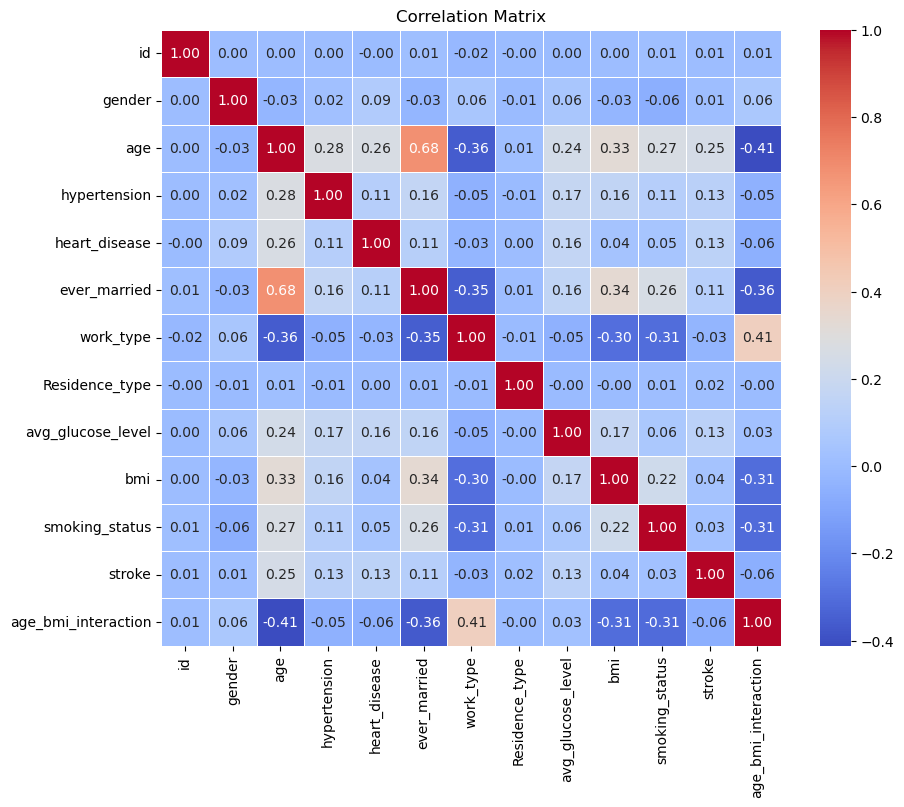

In [3]:
# Compute the correlation matrix including 'stroke'
correlation_matrix = df.corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

The correlation matrix reveals several interesting relationships between stroke occurrence and other variables:

- **Age:** There is a moderate positive correlation (0.25) with stroke, suggesting that older individuals are more likely to experience strokes.
- **Hypertension:** There is a weak positive correlation (0.13) with stroke, indicating that individuals with hypertension have a slightly higher likelihood of experiencing strokes.
- **Heart Disease:** There is a weak positive correlation (0.13) with stroke, meaning that individuals with heart disease are slightly more likely to experience strokes.
- **Ever Married:** There is a weak positive correlation (0.11) with stroke, which might imply some association between marital status and stroke occurrence.
- **Average Glucose Level:** There is a weak positive correlation (0.13) with stroke, suggesting that higher glucose levels are somewhat associated with an increased risk of strokes.
- **BMI and Smoking Status:** Both have very weak correlations with stroke, implying limited direct associations.

## **Stroke Occurrence by Gender**

<Figure size 1200x800 with 0 Axes>

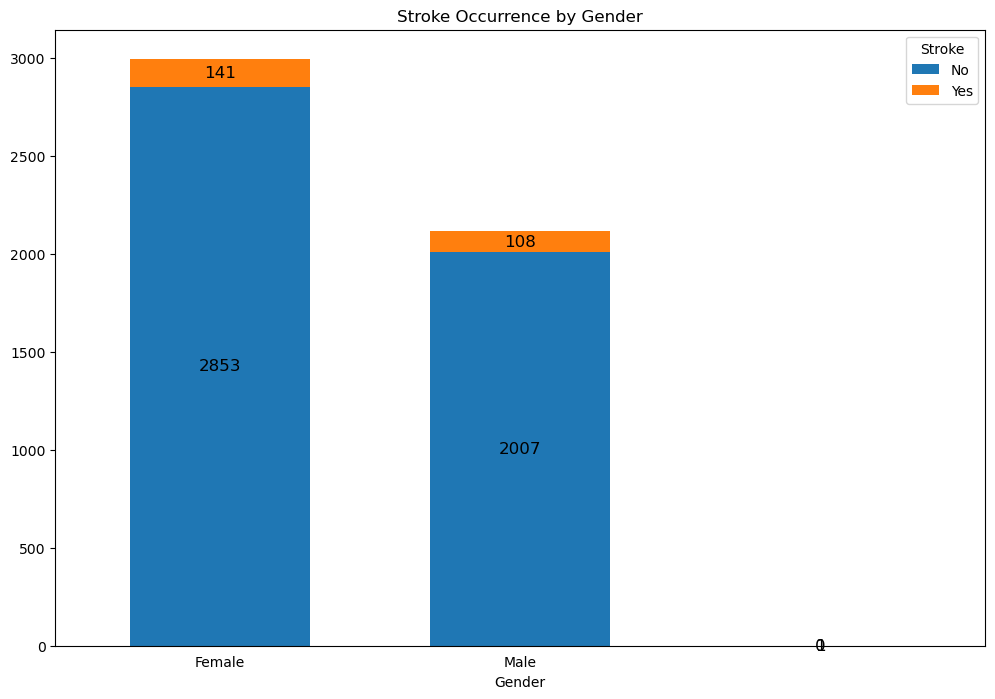

In [4]:
# Map 'Residence_type' column to 'Rural' and 'Urban'
df['Residence_type'] = df['Residence_type'].map({0: 'Rural', 1: 'Urban'})

# Map 'stroke' column to 'Yes' and 'No'
df['stroke'] = df['stroke'].map({0: 'No', 1: 'Yes'})

# Set the color theme
sns.set_palette("coolwarm")

# Stacked bar chart for gender vs stroke occurrence
plt.figure(figsize=(12, 8))
stroke_gender_counts = df.groupby(['gender', 'stroke']).size().unstack().fillna(0)
ax = stroke_gender_counts.plot(kind='bar', stacked=True, width=0.6, color=['#1f77b4', '#ff7f0e'], figsize=(12, 8))

plt.title('Stroke Occurrence by Gender')
plt.xlabel('Gender')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'], rotation=0)

# Add numbers for stroke and non-stroke occurrences
for i, (no, yes) in enumerate(stroke_gender_counts.values):
    ax.text(i, no + yes / 2, f'{int(yes)}', ha='center', va='center', fontsize=12, color='black')
    ax.text(i, no / 2, f'{int(no)}', ha='center', va='center', fontsize=12, color='black')

plt.legend(title='Stroke')
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=True)
plt.show()

The bar chart shows that while more females experience strokes in absolute numbers (141 vs. 108 in males), the proportion of stroke cases is slightly higher in males (5.11%) than in females (4.71%). However, the correlation matrix reveals that gender has an extremely weak correlation (0.01) with stroke occurrence, suggesting it is not a significant factor.

## **Stroke Occurrence by Hypertension**

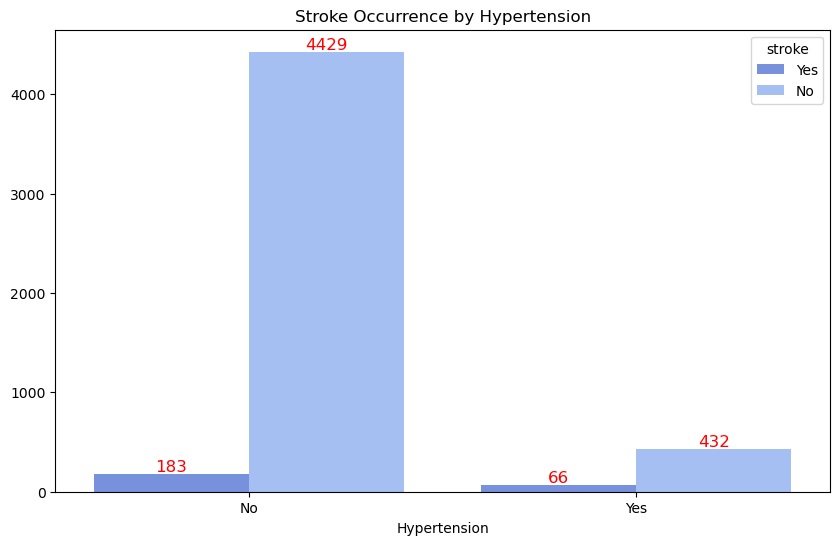

In [5]:
# Bar chart for hypertension vs stroke occurrence
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='hypertension', hue='stroke', data=df)
plt.title('Stroke Occurrence by Hypertension')
plt.xlabel('Hypertension')
plt.ylabel('')

# Add labels for hypertension status
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

# Add numbers in red on top of the bars, only if the count is non-zero
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', fontsize=12, color='red', xytext=(0, 5), textcoords='offset points')

plt.show()

The bar chart illustrates the connection between hypertension and the occurrence of strokes. While a larger total number of strokes is observed in individuals without hypertension (183 compared to 66 in those with hypertension), the proportion of strokes within each group is more telling. Individuals with hypertension show a noticeably higher proportion of strokes relative to their group size, suggesting that hypertension could play a significant role as a risk factor for stroke. However, strokes in individuals without hypertension indicate that other factors also contribute to stroke occurrence, highlighting the multifaceted nature of this medical condition. This aligns with existing research on the impact of hypertension on cardiovascular health.

## **Stroke Likelihood Based on Residence**

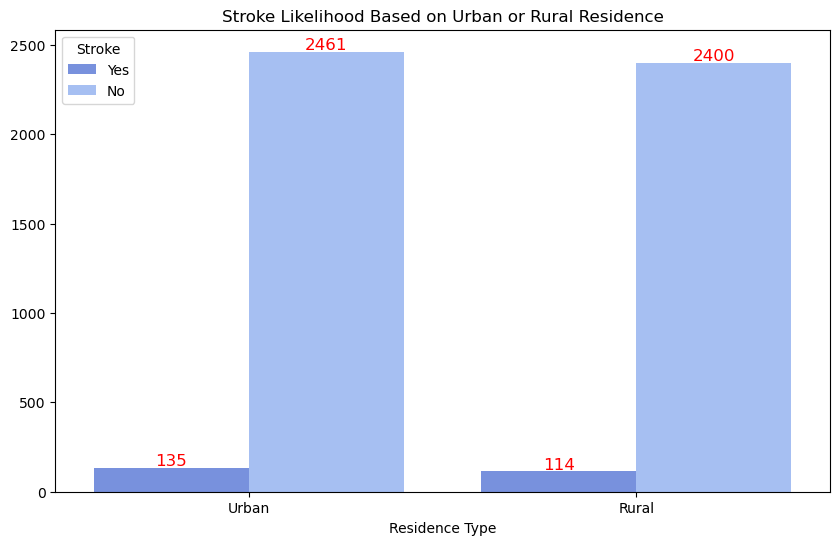

In [6]:
# Bar chart for Residence_type vs stroke occurrence
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Residence_type', hue='stroke', data=df)
plt.title('Stroke Likelihood Based on Urban or Rural Residence')
plt.xlabel('Residence Type')
plt.ylabel('')

# Add total count annotations, only if the count is non-zero
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', fontsize=12, color='red', xytext=(0, 5), textcoords='offset points')

plt.legend(title='Stroke')
plt.show()

The bar chart compares stroke occurrence between individuals living in urban and rural areas. Although the total number of strokes is slightly higher in urban areas (135 compared to 114 in rural areas), the proportion of strokes relative to the total population within each group appears relatively similar. This suggests that while the absolute numbers differ, residence type—whether urban or rural—may not play a significant role as a risk factor for strokes. However, other contributing factors, such as lifestyle, environmental conditions, or access to healthcare, could still influence these outcomes. This observation aligns with the need to consider multiple variables when analyzing stroke likelihood.

## **BMI vs. Average Glucose Level by Stroke Outcome**

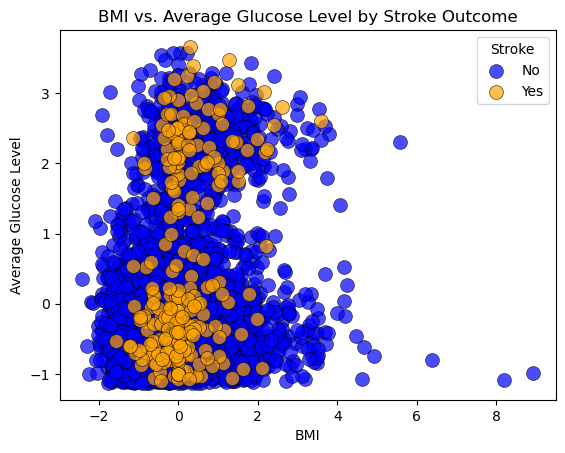

In [7]:
# Plot 'No' category first
sns.scatterplot(x='bmi', y='avg_glucose_level', data=df[df['stroke'] == 'No'], color='blue', alpha=0.7, s=100, edgecolor='k', linewidth=0.5)
# Plot 'Yes' category on top
sns.scatterplot(x='bmi', y='avg_glucose_level', data=df[df['stroke'] == 'Yes'], color='orange', alpha=0.7, s=100, edgecolor='k', linewidth=0.5)
plt.title('BMI vs. Average Glucose Level by Stroke Outcome')
plt.xlabel('BMI')
plt.ylabel('Average Glucose Level')
plt.legend(['No', 'Yes'], title='Stroke')
plt.show()

## **Age Distribution by Stroke Outcome**

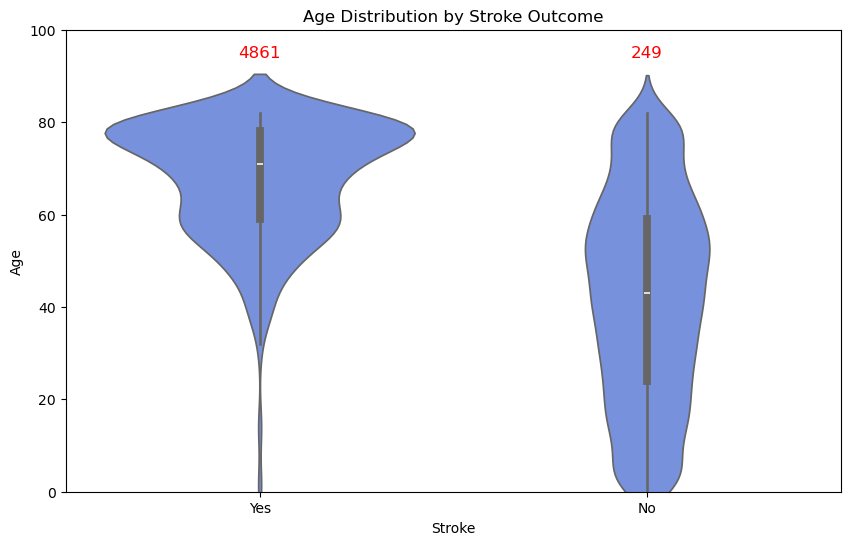

In [8]:
# Map 'stroke' column to 'Yes' and 'No'
df_plot['stroke'] = df_plot['stroke'].map({0: 'No', 1: 'Yes'})

# Calculate the counts for each category
stroke_counts = df_plot['stroke'].value_counts()

# Plot age distribution by stroke outcome
plt.figure(figsize=(10, 6))
sns.violinplot(x='stroke', y='age', data=df_plot)
plt.xlabel('Stroke')
plt.ylabel('Age')
plt.title('Age Distribution by Stroke Outcome')
plt.ylim(0, 100)  # Adjust the y-axis limits to match the age range

# Add total count annotations
for i, count in enumerate(stroke_counts):
    plt.text(i, 95, f'{count}', ha='center', va='center', fontsize=12, color='red')

plt.show()

## **Logistic Regression**

In [9]:
# Logistic Regression with balanced class weights
logreg = LogisticRegression(max_iter=2000, solver='liblinear', class_weight='balanced')
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification = classification_report(y_test, y_pred, zero_division=0)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification)

Accuracy: 0.7455968688845401
Confusion Matrix:
[[715 245]
 [ 15  47]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.74      0.85       960
           1       0.16      0.76      0.27        62

    accuracy                           0.75      1022
   macro avg       0.57      0.75      0.56      1022
weighted avg       0.93      0.75      0.81      1022



## **Conclusion**

The analysis of this dataset and accompanying graphs highlights key factors influencing stroke occurrence. While demographic variables like gender and residence type show minimal correlation with stroke risk, stronger associations are observed with age, hypertension, and heart disease. These findings underscore the significance of managing underlying health conditions as a priority in stroke prevention efforts. Age, in particular, demonstrates the highest correlation with stroke, suggesting that age-related health issues warrant careful attention. Preventative measures should, therefore, focus on addressing modifiable risk factors like hypertension and heart disease while integrating age-specific healthcare strategies to mitigate the overall risk of stroke. This comprehensive approach is crucial for developing effective interventions and improving health outcomes.

Additionally, the logistic regression model highlighted challenges in predicting stroke occurrence due to the dataset’s imbalance. While the model achieved good recall for stroke cases (76%), its precision was only 16%, indicating a high rate of false positives. This shows the need for strategies like oversampling or alternative algorithms to improve predictions. These findings emphasize the importance of effective prevention strategies and better modeling techniques to enhance stroke detection efforts.

## **References**

- [Stroke Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)